# import libraries

In [8]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.4 MB/s eta 0:00:00


In [9]:
pip install category_encoders

In [10]:
# gestión de datos
import numpy as np
import pandas as pd

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# modelos
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# quitar alertas
import warnings
warnings.filterwarnings("ignore")

# import data


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/MyDrive/TIC/Data science/Master Data Science Nuclio - profesor/Aprendizaje supervisado - Presencial/Ejercicios/Regresion - Black Friday/entrenar.csv')
df_pred = pd.read_csv('/content/drive/MyDrive/TIC/Data science/Master Data Science Nuclio - profesor/Aprendizaje supervisado - Presencial/Ejercicios/Regresion - Black Friday/predecir.csv')

In [13]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [14]:
df_pred

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


# data cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [16]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [17]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

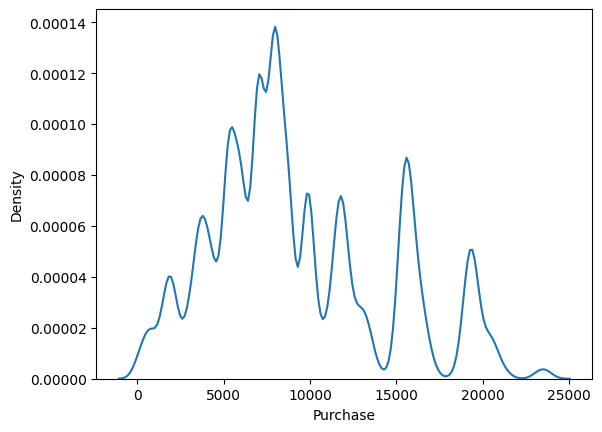

In [18]:
sns.kdeplot(data=df, x='Purchase')
plt.show

## nulos

In [19]:
# cantidad de nulos

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [20]:
df_pred.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [21]:
# reemplazamos los nulos por 0

df.fillna(0, inplace=True)
df_pred.fillna(0, inplace=True)

In [22]:
df.isnull().sum().sum()

0

In [23]:
df_pred.isnull().sum().sum()

0

## gestión de variables

### Gender

In [24]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [25]:
# reemplazamos la columna Gender por la booleana Gender_F
# se puede hacer perfectamente con el mismo resultado con one hot encoding y eliminando una de las 2 columnas creadas

df['Gender_F'] = df['Gender'].apply(lambda x:
                                              0 if x=='M'
                                              else 1)
df_pred['Gender_F'] = df_pred['Gender'].apply(lambda x:
                                              0 if x=='M'
                                              else 1)
df.drop('Gender', axis=1, inplace=True)
df_pred.drop('Gender', axis=1, inplace=True)

### Age

In [26]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [27]:
# cambiamos el tramo de edad por un número de menor a mayor según el tramo

df['Age'] = df['Age'].map({'0-17': 0,
                           '18-25': 1,
                           '26-35': 2,
                           '36-45': 3,
                           '46-50': 4,
                           '51-55': 5,
                           '55+': 6})

df_pred['Age'] = df_pred['Age'].map({'0-17': 0,
                                     '18-25': 1,
                                     '26-35': 2,
                                     '36-45': 3,
                                     '46-50': 4,
                                     '51-55': 5,
                                     '55+': 6})

### Ocupation

In [28]:
df['Occupation'].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

In [29]:
# comprobamos el % de representación de cada valor de la variable

df_occupacion = df['Occupation'].value_counts(normalize=True).to_frame().reset_index()
df_occupacion.columns = ['Occupation', 'frecuencia']
df_occupacion

,Occupation,frecuencia
0,4,0.131453
1,0,0.126599
2,7,0.107501
3,1,0.086218
4,17,0.072796
5,20,0.061014
6,12,0.056682
7,14,0.049647
8,2,0.048336
9,16,0.046123


In [30]:
# añado una columna con la frecuencia acumulada
df_occupacion['frecuencia_cumul'] = df_occupacion['frecuencia'].cumsum()

# redondeo y lo multiplico por 100

df_occupacion['frecuencia'] = np.round(df_occupacion['frecuencia'].mul(100), 1)
df_occupacion['frecuencia_cumul'] = np.round(df_occupacion['frecuencia_cumul'].mul(100), 1)
df_occupacion

,Occupation,frecuencia,frecuencia_cumul
0,4,13.1,13.1
1,0,12.7,25.8
2,7,10.8,36.6
3,1,8.6,45.2
4,17,7.3,52.5
5,20,6.1,58.6
6,12,5.7,64.2
7,14,5.0,69.2
8,2,4.8,74.0
9,16,4.6,78.6


In [31]:
# filtramos las 12 ocupaciones más frecuentes (85,5% del total)

top12 = list(df_occupacion[:12]['Occupation'])
top12

[4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, 3]

In [32]:
# afecto el valor de la categoria con una función lambda
# si el valor no es de las 12 mejores categorias, se llamará 'otro'

df['Occupation'] = df['Occupation'].apply(lambda x:
                                              x if x in top12
                                              else 'otra')

df_pred['Occupation'] = df_pred['Occupation'].apply(lambda x:
                                                          x if x in top12
                                                          else 'otra')

### City_Category

In [33]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

se tratará con one hot encoding al tener solo 3 categorías

### Stay_In_Current_City_Years

In [34]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [35]:
# cambiamos el '4+' por 4, pasando la variable a ser int

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x:
                                                                                4 if x=='4+'
                                                                                else int(x))
df_pred['Stay_In_Current_City_Years'] = df_pred['Stay_In_Current_City_Years'].apply(lambda x:
                                                                                      4 if x=='4+'
                                                                                      else int(x))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  object 
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Gender_F                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 50.4+ MB


### User_ID

In [37]:
df['User_ID'].value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [38]:
# guardamos los userID en una lista

User_ID_pred = df_pred['User_ID']

In [39]:
# comprobamos el % de representación de cada valor de la variable

df_user_id = df['User_ID'].value_counts(normalize=True).to_frame().reset_index()
df_user_id.columns = ['User_ID', 'frecuencia']
df_user_id.head(20)

,User_ID,frecuencia
0,1001680,0.001865
1,1004277,0.001780
2,1001941,0.001633
3,1001181,0.001567
4,1000889,0.001496
5,1003618,0.001394
6,1001150,0.001367
7,1001015,0.001345
8,1005795,0.001325
9,1005831,0.001322


In [40]:
# añado una columna con la frecuencia acumulada

df_user_id['frecuencia_cumul'] = df_user_id['frecuencia'].cumsum()

# redondeo y lo multiplico por 100

df_user_id['frecuencia'] = np.round(df_user_id['frecuencia'].mul(100), 1)
df_user_id['frecuencia_cumul'] = np.round(df_user_id['frecuencia_cumul'].mul(100), 1)
df_user_id.head(20)

,User_ID,frecuencia,frecuencia_cumul
0,1001680,0.2,0.2
1,1004277,0.2,0.4
2,1001941,0.2,0.5
3,1001181,0.2,0.7
4,1000889,0.1,0.8
5,1003618,0.1,1.0
6,1001150,0.1,1.1
7,1001015,0.1,1.2
8,1005795,0.1,1.4
9,1005831,0.1,1.5


In [41]:
# pip install category_encoders

In [42]:
# from category_encoders import TargetEncoder

# vamos a cambiar la variable por el valor de la media de la target por categoría
# TargetEncoder solo transforma variable categóricas: cambiamos User_ID a categórica

df['User_ID'] = df['User_ID'].astype('category')
df_pred['User_ID'] = df_pred['User_ID'].astype('category')

codificador = TargetEncoder()
df['User_ID'] = codificador.fit_transform(df['User_ID'], df['Purchase'])
df_pred['User_ID'] = codificador.transform(df_pred['User_ID'])

### Product_ID

In [43]:
df['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [44]:
Product_ID_pred = df_pred['Product_ID']

In [45]:
# comprobamos el % de representación de cada valor de la variable

df_product_id = df['Product_ID'].value_counts(normalize=True).to_frame().reset_index()
df_product_id.columns = ['Product_ID', 'frecuencia']

# añado una columna con la frecuencia acumulada

df_product_id['frecuencia_cumul'] = df_product_id['frecuencia'].cumsum()

# redondeo y lo multiplico por 100

df_product_id['frecuencia'] = np.round(df_product_id['frecuencia'].mul(100), 1)
df_product_id['frecuencia_cumul'] = np.round(df_product_id['frecuencia_cumul'].mul(100), 1)
df_product_id.head(20)

,Product_ID,frecuencia,frecuencia_cumul
0,P00265242,0.3,0.3
1,P00025442,0.3,0.6
2,P00110742,0.3,0.9
3,P00112142,0.3,1.2
4,P00057642,0.3,1.5
5,P00184942,0.3,1.7
6,P00046742,0.3,2.0
7,P00058042,0.3,2.3
8,P00059442,0.3,2.5
9,P00145042,0.3,2.8


In [46]:
# vamos a cambiar la variable por el valor de la media de la target por categoría
# TargetEncoder solo transforma variable categóricas: cambiamos User_ID a categórica

from category_encoders import TargetEncoder

df['Product_ID'] = df['Product_ID'].astype('category')
df_pred['Product_ID'] = df_pred['Product_ID'].astype('category')

codificador = TargetEncoder()
df['Product_ID'] = codificador.fit_transform(df['Product_ID'], df['Purchase'])
df_pred['Product_ID'] = codificador.transform(df_pred['Product_ID'])

### Product_Category_1

In [47]:
df['Product_Category_1'].value_counts()

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [48]:
# pasamos la variable a categórica

df['Product_Category_1'] = df['Product_Category_1'].astype('category')
df_pred['Product_Category_1'] = df_pred['Product_Category_1'].astype('category')

se tratará con one hot encoding

### Product_Category_2

In [49]:
df['Product_Category_2'].value_counts()

Product_Category_2
0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: count, dtype: int64

In [50]:
# pasamos la variable a categórica

df['Product_Category_2'] = df['Product_Category_2'].astype('category')
df_pred['Product_Category_2'] = df_pred['Product_Category_2'].astype('category')

se tratará con one hot encoding

### Product_Category_3

In [51]:
df['Product_Category_3'].value_counts()

Product_Category_3
0.0     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: count, dtype: int64

In [52]:
# pasamos la variable a categórica

df['Product_Category_3'] = df['Product_Category_3'].astype('category')
df_pred['Product_Category_3'] = df_pred['Product_Category_3'].astype('category')

se tratará con one hot encoding

# preprocessing

## correlaciones

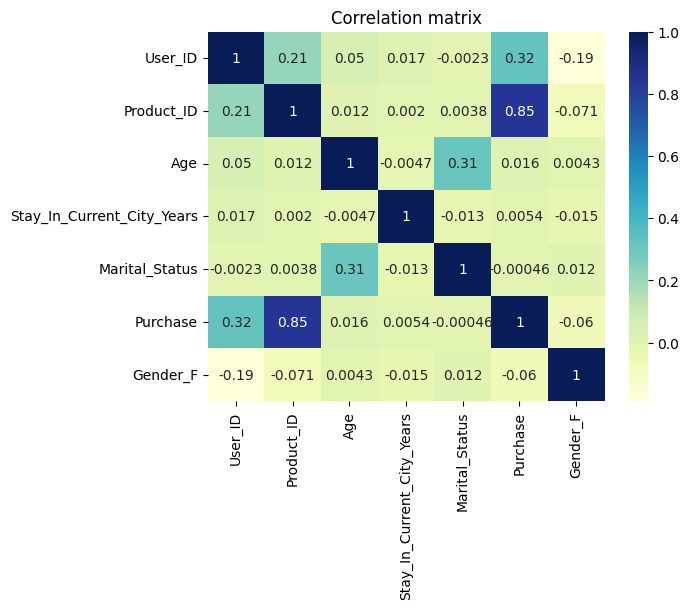

In [53]:
# Heatmap de correlaciones

df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap="YlGnBu").set_title('Correlation matrix')
plt.show()

## one hot encoding

In [54]:
df = pd.get_dummies(df)
df_pred = pd.get_dummies(df_pred)

In [55]:
df.shape

(550068, 77)

## variables con poca varianza

In [56]:
df.var(numeric_only=True)

User_ID                       2.324246e+06
Product_ID                    1.776127e+07
Age                           1.832319e+00
Stay_In_Current_City_Years    1.662662e+00
Marital_Status                2.418379e-01
                                  ...     
Product_Category_3_14.0       3.237903e-02
Product_Category_3_15.0       4.833302e-02
Product_Category_3_16.0       5.581080e-02
Product_Category_3_17.0       2.944163e-02
Product_Category_3_18.0       8.344521e-03
Length: 77, dtype: float64

In [57]:
# eliminamos las variables con más del 99% de valores iguales
for col in df.columns:
  if list(df[col].value_counts(normalize=True))[0] > 0.99:
    print("se elimina ", col)
    df = df.drop(col, axis=1)

se elimina  Product_Category_1_7
se elimina  Product_Category_1_9
se elimina  Product_Category_1_10
se elimina  Product_Category_1_12
se elimina  Product_Category_1_14
se elimina  Product_Category_1_17
se elimina  Product_Category_1_18
se elimina  Product_Category_1_19
se elimina  Product_Category_1_20
se elimina  Product_Category_2_3.0
se elimina  Product_Category_2_7.0
se elimina  Product_Category_2_10.0
se elimina  Product_Category_2_18.0
se elimina  Product_Category_3_3.0
se elimina  Product_Category_3_4.0
se elimina  Product_Category_3_6.0
se elimina  Product_Category_3_10.0
se elimina  Product_Category_3_11.0
se elimina  Product_Category_3_13.0
se elimina  Product_Category_3_18.0


In [58]:
df.shape

(550068, 57)

## split train/test

In [59]:
# se guarda la target como y y las features como X
y = df['Purchase']
X = df.drop('Purchase', axis=1)

# se guarda un 30% de datos para el test y un 70% para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## estandarización

In [60]:
# se estandarizan las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)         # estandariza según la regla definida con el X_train, con la media de X_train

In [61]:
# se estandarizan las variables del dataset a predecir según la regla definida con el X_train
# df_pred = scaler.transform(df_pred)

# da error porque debido al one hot encoding, algunas columnas del dataset de entrenamiento no están en el dataset a predecir y vices versa

In [62]:
# columnas que están en el dataset de entrenamiento pero no están en el dataset de predicción

col_faltantes = []
for col in df.columns:
  if col not in df_pred.columns:
    col_faltantes.append(col)
col_faltantes

['Purchase']

In [63]:
# elimino la target de la lista

col_faltantes.remove('Purchase')

In [64]:
# añadimos las columnas faltante al dataset de predicción con 0

for col in col_faltantes:
  df_pred[col] =[0]*len(df_pred)

In [65]:
# columnas que están en el dataset de predicción pero no en el dataset de entrenamiento (nueva categoría)

col_sobrantes = []
for col in df_pred.columns:
  if col not in df.columns:
    col_sobrantes.append(col)
col_sobrantes

['Product_Category_1_7',
 'Product_Category_1_9',
 'Product_Category_1_10',
 'Product_Category_1_12',
 'Product_Category_1_14',
 'Product_Category_1_17',
 'Product_Category_1_18',
 'Product_Category_2_3.0',
 'Product_Category_2_7.0',
 'Product_Category_2_10.0',
 'Product_Category_2_18.0',
 'Product_Category_3_3.0',
 'Product_Category_3_4.0',
 'Product_Category_3_6.0',
 'Product_Category_3_10.0',
 'Product_Category_3_11.0',
 'Product_Category_3_13.0',
 'Product_Category_3_18.0']

In [66]:
# eliminamos las columnas sobrantes, ya que el modelo no ha sido entrenado con ellas

df_pred.drop(col_sobrantes, axis=1, inplace=True)

In [67]:
# verificamos que los dataset tienen el mismo número de variables

df_pred.shape[1] == X.shape[1]

True

In [68]:
# ponemos las columnas del dataset de predicción en el mismo orden que el de entrenamiento con reindex

columnas = X.columns
df_pred = df_pred.reindex(columns=columnas)

In [69]:
# ya se pueden estandarizar las variables del dataset a predecir según la regla definida con el X_train con transform
df_pred = scaler.transform(df_pred)

# modelado

In [70]:
# añadimos en una lista los modelos que queremos poner a competir

modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('Lasso', Lasso()))
modelos.append(('Ridge', Ridge()))
modelos.append(('ElasticNet', ElasticNet()))
# modelos.append(('SGDRegressor', SGDRegressor()))
# modelos.append(('SVC', SVC()))
# modelos.append(('RandomForestRegressor', RandomForestRegressor()))
modelos.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
modelos.append(('XGBRegressor', XGBRegressor(objective ='reg:squarederror')))
modelos.append(('CatBoostRegressor', CatBoostRegressor(verbose=False)))

## competición de modelos

In [71]:
metricas_modelos = pd.DataFrame(columns=['modelo', 'RMSE'])

for nombre, modelo in modelos:

    # entrenamos el modelo
    modelo.fit(X_train, y_train)

    # hacemos la predicción sobre el dataset de test
    y_pred = modelo.predict(X_test)

    # cambiamos las predicciones negativas por 0
    for i, pred in enumerate(y_pred):
      if pred < 0:
        y_pred[i]=0

    # sacamos la medida RMSE
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    # imprimimos el resultado por modelo
    metricas_modelos = pd.concat([metricas_modelos,
                                  pd.DataFrame({'modelo': nombre, 'RMSE': rmse}, index=[0])
                                  ])
    print(modelo, rmse)

metricas_modelos.sort_values('RMSE')

LinearRegression() 2586.790932286419
Lasso() 2586.776718041585
Ridge() 2586.7906579490946
ElasticNet() 2861.2244608057094
GradientBoostingRegressor() 2557.9100667043062
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 2513.8381873844637
<catboost.core.CatBoostRegressor object at 0x7d3b5d249e10> 2504.4

,modelo,RMSE
0,CatBoostRegressor,2504.486355
0,XGBRegressor,2513.838187
0,GradientBoostingRegressor,2557.910067
0,Lasso,2586.776718
0,Ridge,2586.790658
0,LinearRegression,2586.790932
0,ElasticNet,2861.224461


## entrenamiento del mejor modelo

In [72]:
model = CatBoostRegressor(verbose=False)

model.fit(X_train,y_train)

X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

# cambiamos los valores negativos de predicción por 0
for i, pred in enumerate(X_test_pred):
  if pred < 0:
    X_test_pred[i]=0

# sacamos el RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, X_test_pred))
rmse

2504.4863553616706

# predicción

In [73]:
predicciones = model.predict(df_pred)
predicciones

array([17411.76613533, 11647.37093991,  6292.81927421, ...,
        9288.75250033, 17407.68622728,  2575.50800836])

In [74]:
df_predicciones = pd.DataFrame()

In [75]:
df_predicciones['User_ID'] = User_ID_pred
df_predicciones['Product_ID'] = Product_ID_pred
df_predicciones['Purchase'] = predicciones

In [76]:
df_predicciones

,User_ID,Product_ID,Purchase
0,1000004,P00128942,17411.766135
1,1000009,P00113442,11647.370940
2,1000010,P00288442,6292.819274
3,1000010,P00145342,2609.998521
4,1000011,P00053842,2641.911038
...,...,...,...
233594,1006036,P00118942,7453.073120
233595,1006036,P00254642,6124.887448
233596,1006036,P00031842,9288.752500
233597,1006037,P00124742,17407.686227


probar diferentes técnicas para medir el impacto (solo con xgboost o catboost para ahorrar tiempo de ejecución):  
- tratando las variables product_category como número y no como categoría
- quitando las variables de user_id y product_id
- ver si hay variables con mucho sesgo para ponerla en escala logarítmica o exponencial
- tratar la edad de forma diferente
- ver si hay outliers y quitarlos
...